# machine learning classification 



In [7]:
# lakukan proses pemanggilan dataset menggunakan pandas
# import pandas 

import pandas as pd
# baca file dataset
df = pd.read_csv("dataset.csv")
# tampilkan file dataset
df

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang
5,4,10,7,0,penyerang
6,9,5,2,2,penyerang
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [8]:
# menampilkan data paling atas 
# default head adalah 5

df.head(3)

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang


In [9]:
# menapilan data terbawah
# default tail adalah 5

df.tail(2)

,kill,assist,death,turret,role
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [10]:
# melihat struktur data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kill    10 non-null     int64 
 1   assist  10 non-null     int64 
 2   death   10 non-null     int64 
 3   turret  10 non-null     int64 
 4   role    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [17]:
# menampilkan informasi statistika 
df.describe()

,kill,assist,death,turret
count,10.000000,10.000000,10.000000,10.000000
mean,6.200000,7.300000,4.100000,1.000000
std,4.211096,4.110961,1.911951,1.154701
min,1.000000,2.000000,2.000000,0.000000
25%,2.250000,4.000000,2.250000,0.000000
50%,6.000000,7.000000,4.000000,0.500000
75%,9.750000,10.750000,5.750000,2.000000
max,12.000000,13.000000,7.000000,3.000000


In [11]:
df["role"]

0    penyerang
1     bertahan
2    penyerang
3     bertahan
4    penyerang
5    penyerang
6    penyerang
7     bertahan
8    penyerang
9     bertahan
Name: role, dtype: object

In [12]:
df['role'].value_counts()

role
penyerang    6
bertahan     4
Name: count, dtype: int64

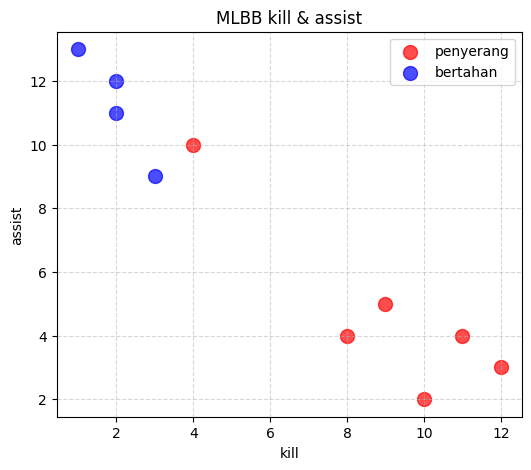

In [13]:
#visualisasi data emnggunakan matplotlib

import matplotlib.pyplot as plt

penyerang = df[df["role"]=="penyerang"]
bertahan = df[df["role"]=="bertahan"]

plt.figure(figsize=(6,5))
plt.scatter(penyerang["kill"],penyerang["assist"],color="red",s=100,alpha=0.7,label="penyerang")
plt.scatter(bertahan["kill"],bertahan["assist"],color="blue",s=100,alpha=0.7,label="bertahan")

plt.xlabel("kill")
plt.ylabel("assist")
plt.title("MLBB kill & assist")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

In [26]:
# membuat modek achine learning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df[["kill","assist","death","turret"]]
y=df["role"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("accuracy: ",accuracy_score(y_test,y_pred))



accuracy:  1.0


In [33]:
data_baru=pd.DataFrame([[5,6,7,0]],columns=["kill","assist","death","turret"])
model.predict(data_baru)

array(['penyerang'], dtype=object)

In [36]:
# menyimpan model machine learning 
# panggil library joblib
import joblib
# simpan model hasil latihan dengan nama "model_mlbb.joblib"
joblib.dump(model,"model_mlbb.joblib")

['model_mlbb.joblib']

In [38]:
# menggunakan model yang sudah di simpan
import joblib

model_tersimpan = joblib.load("model_mlbb.joblib")
data_lain=pd.DataFrame([[4,4,2,2]],columns=["kill","assist","death","turret"])
model_tersimpan.predict(data_lain)[0]

'penyerang'